# % area of a beam

roudn



## Init definitions


In [1]:
# configuration
%load_ext autoreload
%autoreload 2
#%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'


In [2]:
# import modules
from diffractio import sp, plt, mm, um, nm, degrees, np

from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_optics import beam_width_1D, beam_width_2D
from diffractio.utils_math import cart2pol, nearest


from py_eye.LIO.angular_lens import Angular_lens

from numpy import sqrt, pi, exp, linspace, random, zeros_like
from scipy import rand

from pprint import  pprint
np.set_printoptions(precision=3)



In [3]:
cm=10*mm
size = 2*mm
num_data = 1024
x0 = sp.linspace(-size / 2, size / 2, num_data)
y0 = sp.linspace(-size / 2, size / 2, num_data)
wavelength = 0.6328 * um

diameter=size


## dart-board lens

In [4]:
r0=(0*mm,0*mm)
diameter=size

focal_min=99*mm;
focal_max=100*mm;
focal_center=(focal_max+focal_min)/2
num_focals=1; # focales intermedias
num_sectors = 2 #número de sectores con la misma focal
random_focals=False

/home/luismiguel/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


(<Figure size 1000x900 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fe6cf07afd0>)

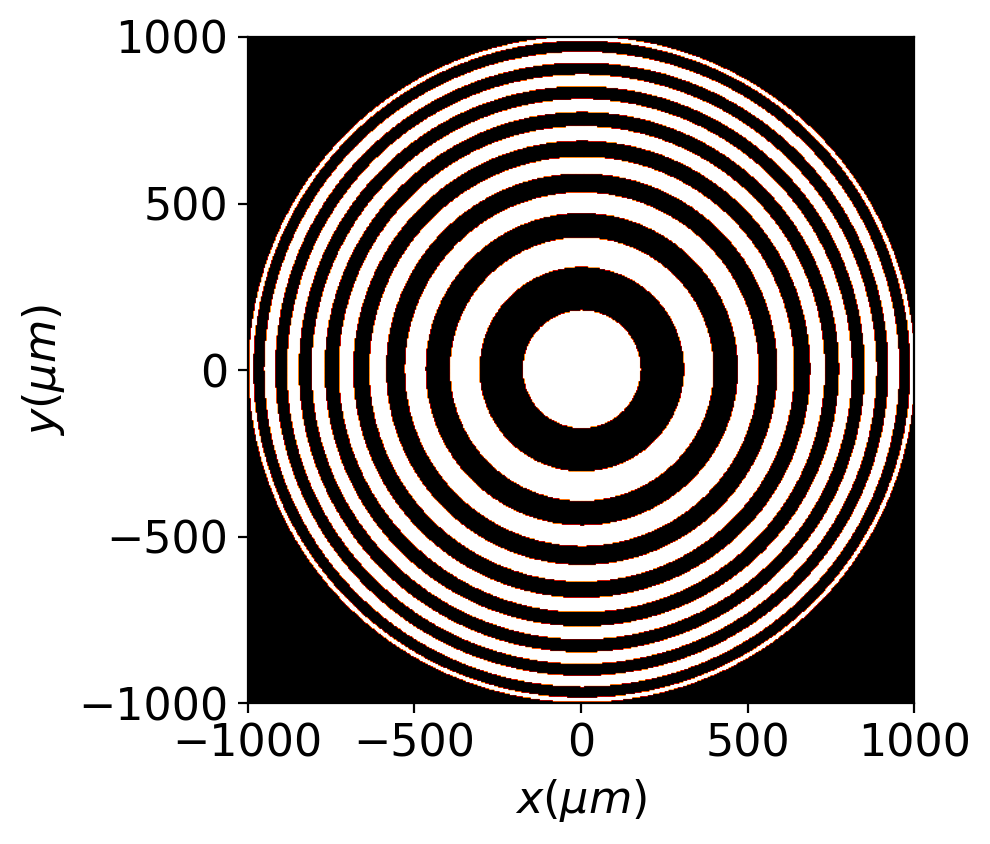

In [5]:
db_lens=Angular_lens(x=x0,y=y0,wavelength=wavelength)
db_lens.dartboard_lens(r0, diameter, focal_min, focal_max, num_focals=num_focals, 
                   num_sectors=num_sectors, has_random_focals=True, angle=0*degrees)
db_lens.draw()

(<Figure size 1000x900 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fe6bdf315f8>)

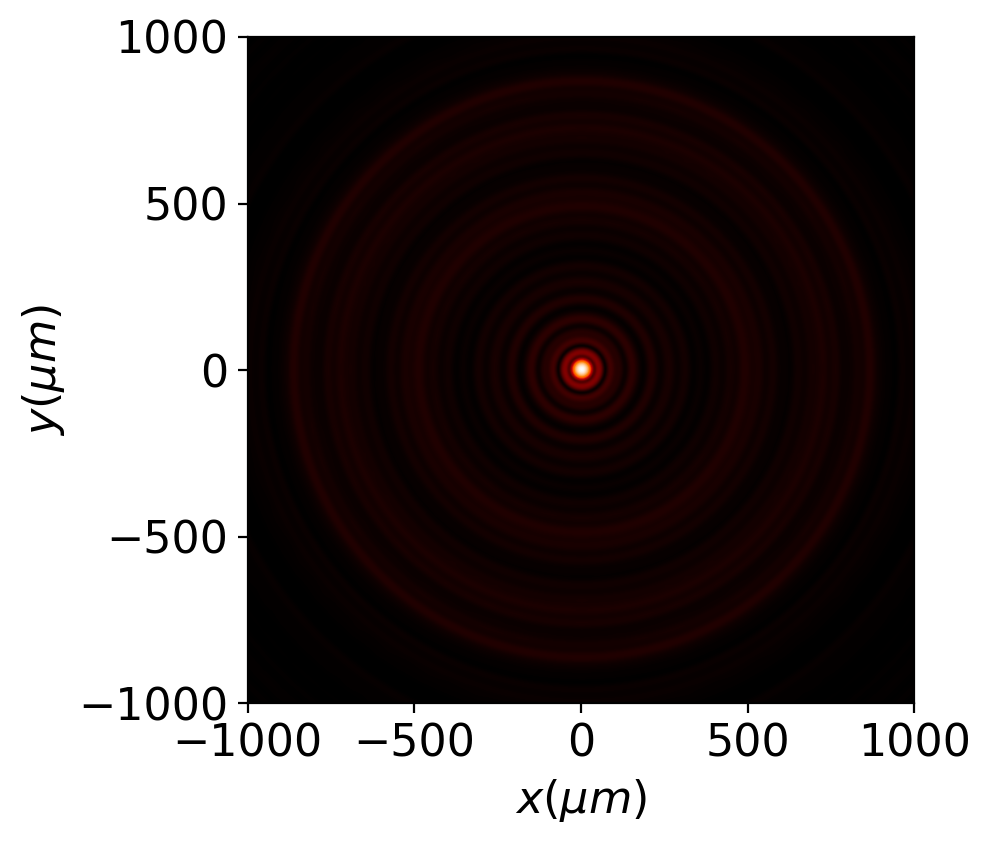

In [6]:
u_focus_db=db_lens.RS(z=focal_center,new_field=True)
u_focus_db.draw(kind='intensity', logarithm=True)

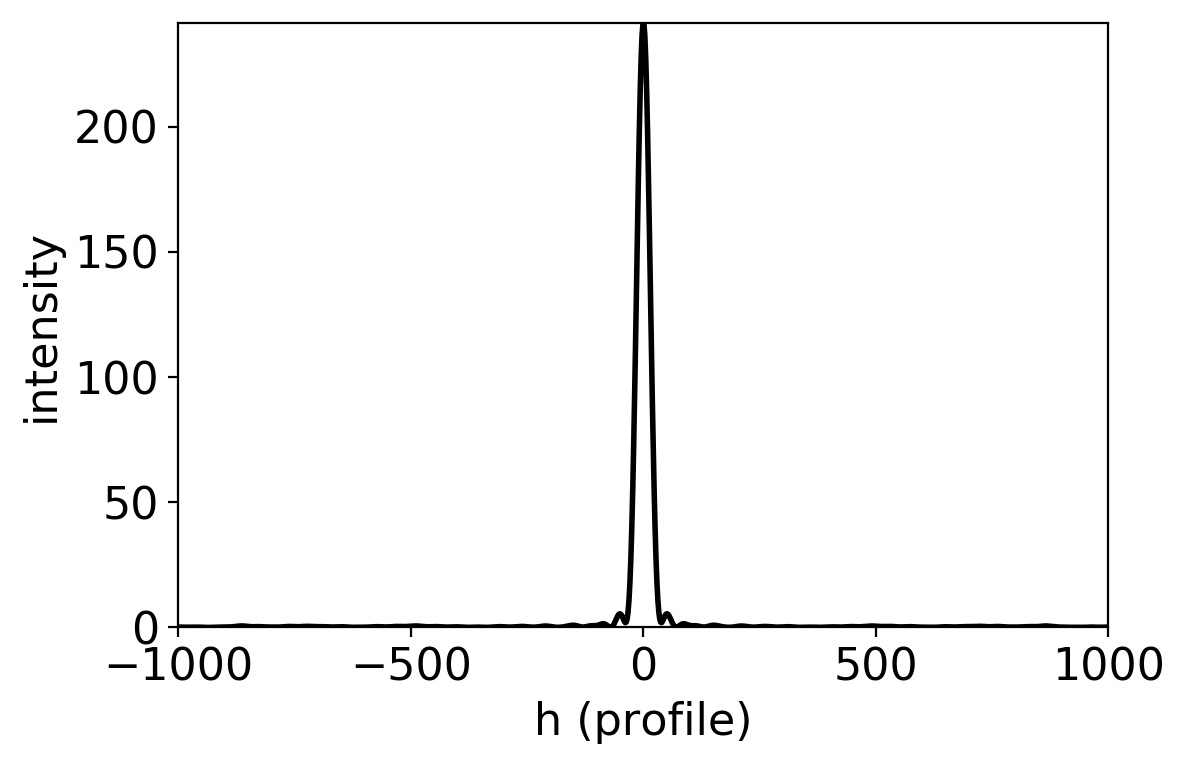

In [7]:
u_focus_db.draw_profile(point1=[-1*mm,0],point2=[1*mm,0], npixels=1000, 
                        kind='intensity', order=2);


(-100, 100)

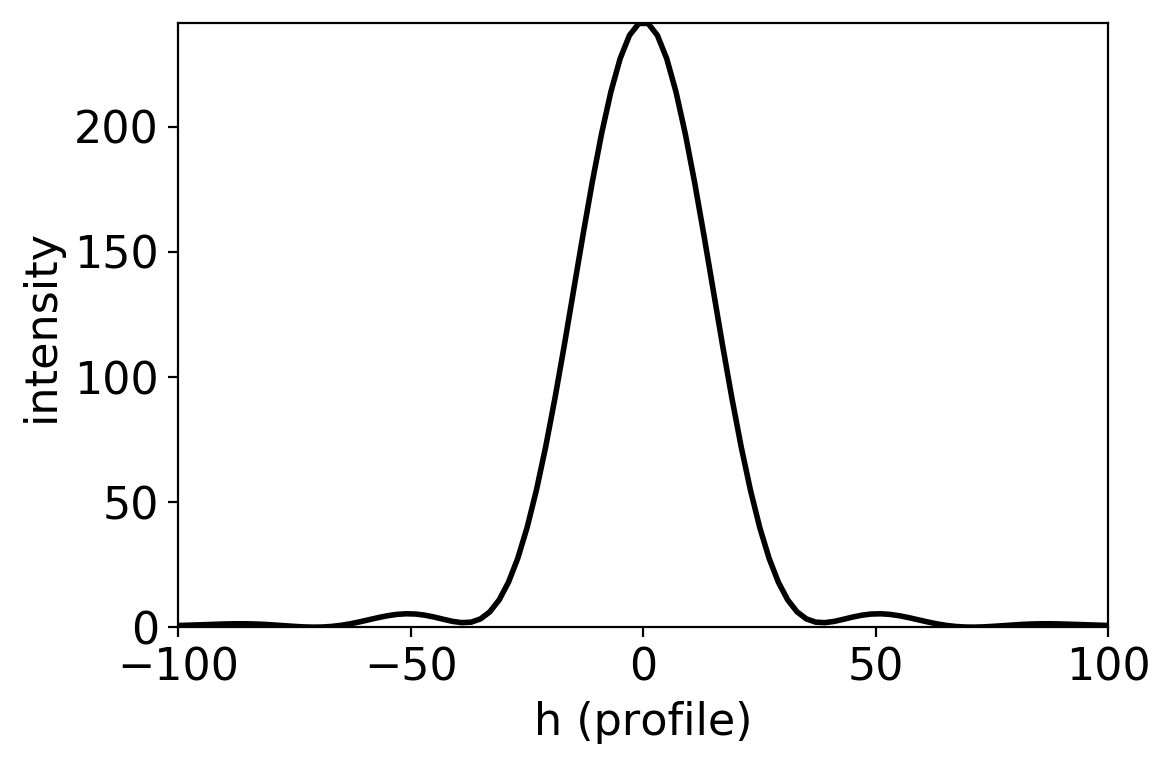

In [8]:
u_focus_db.draw_profile(point1=[-1*mm,0],point2=[1*mm,0], npixels=1000, 
                        kind='intensity', order=2);
plt.xlim(-100,100)

(0.01921701559160816, 2)

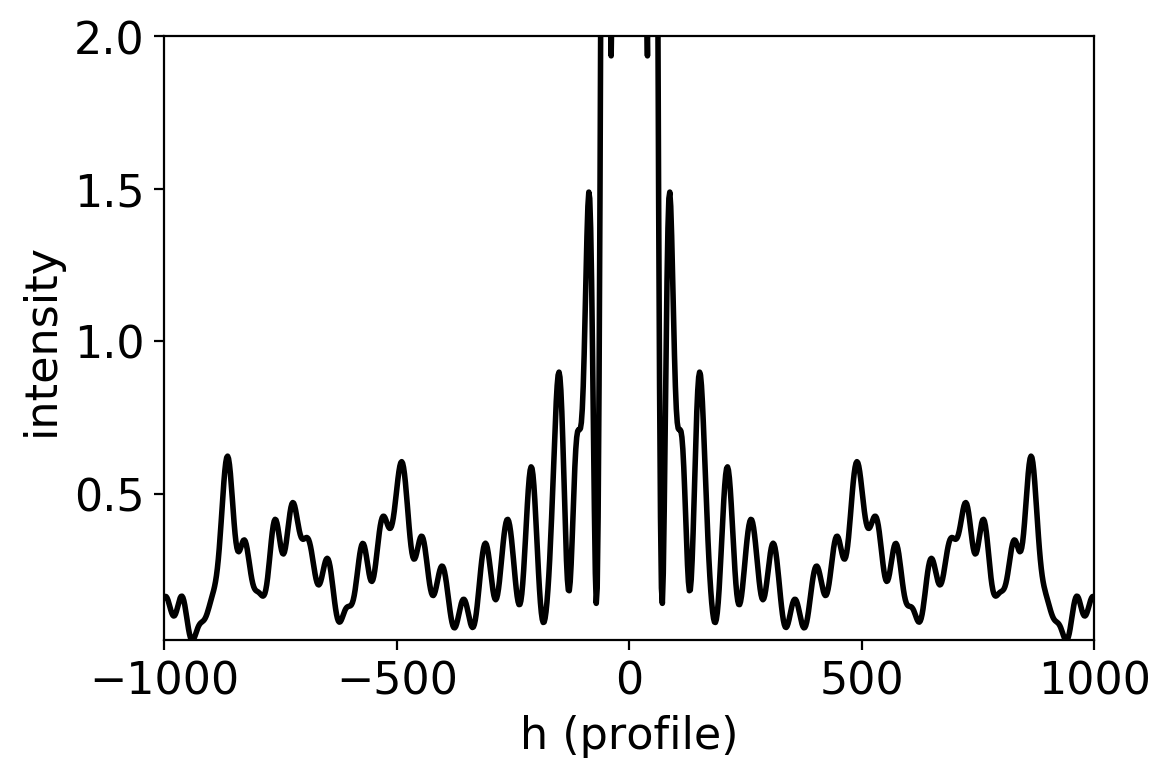

In [9]:
u_focus_db.draw_profile(point1=[-1*mm,0],point2=[1*mm,0], npixels=1000, 
                        kind='intensity', order=2);
plt.ylim(top=2)

## area

In [10]:
def intensity_area(u, r0, radius, power=1, has_drawing=True):
    intensities=np.zeros_like(radius)
    mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

    for i,r in enumerate(radius):
        mask.circle(r0=r0, radius=(r,r), angle=0)
        masked_field=u*mask
        intensities[i]=masked_field.intensity().sum()**power
    
    if has_drawing is True:
        plt.figure()
        plt.plot(rs,intensities)
        plt.ylim(bottom=0)
        plt.xlim(left=0, right=rs[-1])
    return intensities

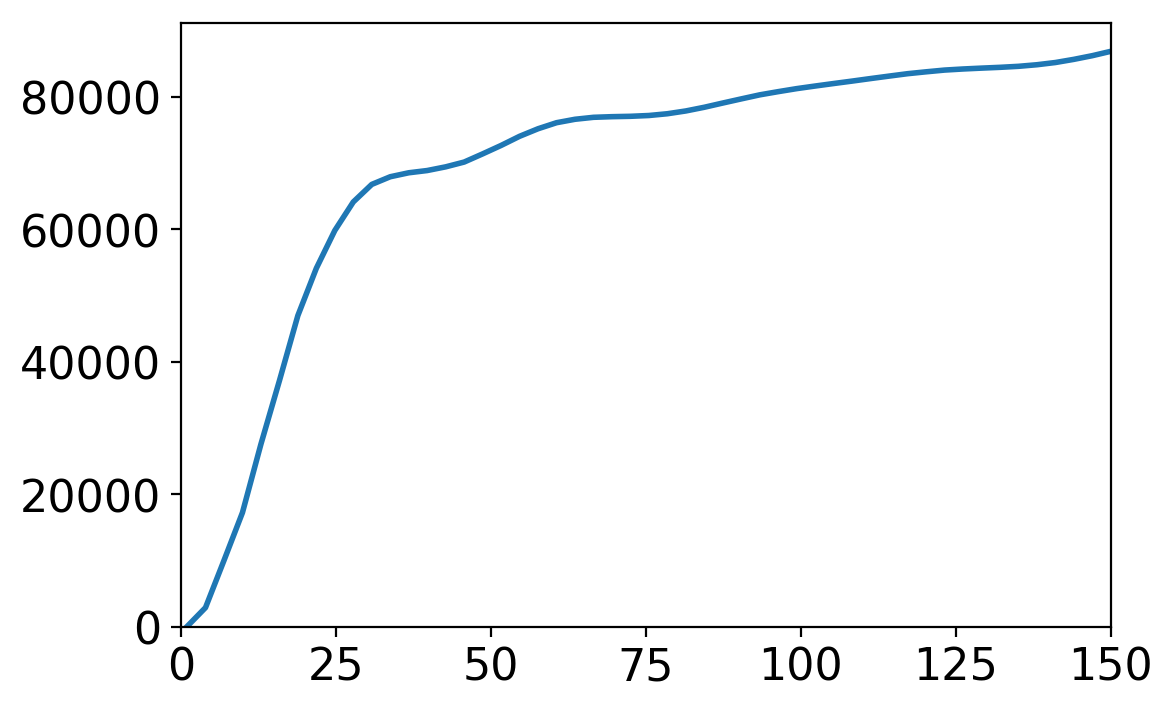

In [11]:
rs=np.linspace(1*um,150*um,51)
intensities=intensity_area(u_focus_db,r0,rs, power=1)

In [177]:
def beam_width_area(rs, intensities, percentaje):
    int_max=intensities.max()
    int_central=int_max*percentaje

    i_max,_,_ = nearest(intensities, int_central )
    return rs[i_max]

In [178]:
BWH=beam_width_area(rs, intensities, percentaje=0.5)
print(BWH)

15.8


## Conclusion

No me gusta del todo porque el máximo suele no ser constante